<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW5_boosting_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практика ML: прогнозирование заработной платы и кластеризация типов движений**

### **Постановка задачи:**

В этой работе две части:

*   В первой части вам предстоит построить алгоритм на основе бустинга для прогнозирования зарплаты
*   Во второй части вам предстоит кластеризовать типы движений по имеющимся данным с акселерометров и гироскопов

### **Оценивание:**

- Как всегда оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.
- Брать код из открытых источников позволительно. Следование культуре цитирования **обязательно.**

### **Баллы:**

Суммарно за задание можно получить 10 основных и 1 бонусный балл.

Оценка за ДЗ = min{ваш балл, 10}

**Мягкий дедлайн: 16 февраля 23:59**

**Интересной вам работы!**


# **Часть 1. Прогнозирование заработной платы при помощи бустинга**

**Количество баллов:** 7

## **Постановка задачи:**

Данные выгружены и лежат в файле `ds_salary.csv`. Вам доступны описания признаков и значения целевой переменной.

**Ваша задача:** построение модели бустинга и оценка данной модели.

## **Описание даных**

- work_year: год, в который взяты данные;
- experience_level: уровень опыта, кодируемый как SE, MI EN или EX
- employment_type: тип занятости (FT, PT, CT, FL)
- job_title: название рабочей позиции в компании;
- salary: зараплата на позиции;
- salary_currency: валюта в которой начисляют зарплату;
- employee_residence: страна или регион проживания сотрудника
- remote_ratio: процент удаленки, предлагаемый в компании (0, 50, 100)
- company_location: местоположение компании
- company_size: размер компании, оцененный как S, M, L
- salary_in_usd: целевая переменная


Как всегда, загрузим набор данных.

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("https://github.com/hse-ds/iad-intro-ds/raw/refs/heads/master/2023/homeworks/hw-08-boosting/ds_salaries.csv")

In [16]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## **Задание 1 (0.3 балла)**

Вам даны описания переменных. Проверьте, что категориальные признаки, категории которых перечислены, не имеют ошибочных значений. Для этого:

- Напишите цикл, пробегающий по выбранным признакам и оценивающий, что в них нет лишних значений;

In [17]:
# Ваш код здесь
"""
Посмотрим, есть ли признаки, которые не даны в условии
если есть, то посмотрим сколько их и возможно ли их чем-то заменить
также посмотрим "глазами" на количество котегориальных признаков,
количество которых не дано в условии
"""
experence_level_list=['SE', 'MI', 'EN', 'EX']
employment_type_list=['FT', 'PT', 'CT', 'FL']
remote_ratio_list=[ 0, 50, 100]
company_size_list=[ 'S', 'M', 'L']
for data in df['experience_level']:
    if data not in experence_level_list:
        print(data)
for data in df['employment_type']:
    if data not in employment_type_list:
        print(data)
for data in df['remote_ratio']:
    if data not in remote_ratio_list:
        print(data)
for data in df['company_size']:
    if data not in company_size_list:
        print(data)


In [18]:

df['job_title'].value_counts()


,count
job_title,
Data Engineer,1040
Data Scientist,840
Data Analyst,612
Machine Learning Engineer,289
Analytics Engineer,103
...,...
Principal Machine Learning Engineer,1
Azure Data Engineer,1
Manager Data Management,1


In [19]:
df['salary_currency'].value_counts()

,count
salary_currency,
USD,3224
EUR,236
GBP,161
INR,60
CAD,25
AUD,9
SGD,6
BRL,6
PLN,5


In [7]:
df['company_location'].value_counts()

,count
company_location,
US,3040
GB,172
CA,87
ES,77
IN,58
...,...
MK,1
BS,1
IR,1


## **Задание 2 (0.3 балла)**

Проведите базовые шаги оценки качества данных.
- Есть есть проблемы, устраните их;
- Если нет проблем, кратко опишите это.

In [20]:
# Ваш код здесь
"""
Видно, что но первый взгляд проблем с данными нет(пропуски отсутствуют)
С выбросами и данными в одном экземпляре мб что-то потом сделаю
"""
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


## **Задание 3 (0.3 балла)**

Вернитесь к описанию признаков.
- Проверьте, все ли признаки соответствуют постановке задачи? Если есть лишние признаки, удалите их и обоснуйте удаление, если нет, сделайте вывод о релевантности (достаточно в одну-две строки)
- Зафиксируйте, в каких признаках много категорий.

In [21]:
# Ваш код здесь

"""
хочется посмотреть на корелляционную матрицу,
для этого сначала сделаем label encoding.
Есть предположение, что колонки со странами, в которых располагается компания,
странами, в которых располагается работник и получаемый доход в валюте могут сильно коррелировать
"""
df1=df.copy()
df1['experience_level']=pd.factorize(df1['experience_level'])[0]
df1['employment_type']=pd.factorize(df1['employment_type'])[0]
df1['job_title']=pd.factorize(df1['job_title'])[0]
df1['salary_currency']=pd.factorize(df1['salary_currency'])[0]
df1['employee_residence']=pd.factorize(df1['employee_residence'])[0]
df1['company_location']=pd.factorize(df1['company_location'])[0]
df1['company_size']=pd.factorize(df1['company_size'])[0]
df1.corr()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,-0.167648,-0.115248,-0.156954,-0.094724,-0.134055,0.228290,-0.279475,-0.236430,-0.261057,0.389401
experience_level,-0.167648,1.000000,0.125208,0.127764,0.032708,0.140135,-0.243669,0.208346,0.044598,0.189563,-0.210922
employment_type,-0.115248,0.125208,1.000000,0.060485,-0.007644,0.059216,-0.126923,0.233934,0.059242,0.129597,-0.088431
job_title,-0.156954,0.127764,0.060485,1.000000,0.041307,0.077588,-0.067952,0.187946,0.064941,0.175600,-0.183533
salary,-0.094724,0.032708,-0.007644,0.041307,1.000000,0.317689,-0.023676,0.158832,0.028731,0.189461,-0.142062
salary_currency,-0.134055,0.140135,0.059216,0.077588,0.317689,1.000000,-0.195700,0.248224,0.029642,0.276746,-0.140724
salary_in_usd,0.228290,-0.243669,-0.126923,-0.067952,-0.023676,-0.195700,1.000000,-0.302527,-0.064171,-0.300085,0.166600
employee_residence,-0.279475,0.208346,0.233934,0.187946,0.158832,0.248224,-0.302527,1.000000,0.100911,0.822244,-0.239687
remote_ratio,-0.236430,0.044598,0.059242,0.064941,0.028731,0.029642,-0.064171,0.100911,1.000000,0.074603,-0.138520
company_location,-0.261057,0.189563,0.129597,0.175600,0.189461,0.276746,-0.300085,0.822244,0.074603,1.000000,-0.232940


In [22]:
df=df.drop('employee_residence', axis=1)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,100,US,L


**Из корреляционной матрици видно, что страна расположения компании сильно коррелирует со страной расположения работника, поэтому можно один из них удалить(проверил, качество на бстинге на деревьях практически не изменяется)**

## **Задание 4 (0.2 балла)**

Разделите выборку на train, test (80%, 20%).

In [23]:
# Ваш код здесь
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('salary_in_usd',axis=1),df['salary_in_usd'], test_size=0.2,shuffle=True)
X_test

,work_year,experience_level,employment_type,job_title,salary,salary_currency,remote_ratio,company_location,company_size
509,2023,SE,FT,Data Analyst,148700,USD,0,US,M
2895,2022,SE,FT,Data Scientist,141525,USD,100,US,M
1182,2023,SE,FT,Data Analyst,75000,USD,100,US,M
1330,2023,EX,FT,Data Engineer,236000,USD,100,US,M
3085,2022,SE,FT,Data Engineer,63000,USD,0,US,M
...,...,...,...,...,...,...,...,...,...
3161,2022,SE,FT,Data Analytics Manager,145000,USD,100,US,M
3291,2022,SE,FT,Data Analyst,61300,USD,100,CA,M
3124,2022,MI,FT,Data Scientist,25000,USD,50,TR,M
1948,2022,SE,FT,Data Engineer,120000,USD,0,US,M


## **Задание 5 (0.3 балла)**

Будем проверять два сценария. Первый — построение модели только на непрерывных признаках, а второй — построение с категориальными. В этом задании подготовьте всё, чтобы проверить валидность обоих сценариев. А именно:

- Выделите данные для тренировки и теста для непрерывных признаков
- Выделите данные для тренировки и теста для непрерывных + категориальных признаков, пока ничего не кодируйте.

In [24]:
# Ваш код здесь
# непрерывные признаки: год,зарплата в валюте,доля удаленки
X_train_nepr=X_train[['work_year','salary','remote_ratio']]
Y_train_nepr=Y_train
X_test_nepr=X_test[['work_year','salary','remote_ratio']]
Y_test_nepr=Y_test
X_test_nepr

,work_year,salary,remote_ratio
509,2023,148700,0
2895,2022,141525,100
1182,2023,75000,100
1330,2023,236000,100
3085,2022,63000,0
...,...,...,...
3161,2022,145000,100
3291,2022,61300,100
3124,2022,25000,50
1948,2022,120000,0


## **Задание 6 (0.2 балла)**

- Обучите модель линейной регресии на числовых признаках и оцените её качество через mape и rmse;
- Сделайте вывод о качестве построенной модели;

In [25]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression
my_model=LinearRegression()
my_model.fit(X_train_nepr,Y_train_nepr)

LinearRegression()

In [26]:
my_answer=my_model.predict(X_test_nepr)

In [27]:
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_percentage_error
print('RMSE=',root_mean_squared_error(Y_test_nepr,my_answer) )
print('MAPE=',mean_absolute_percentage_error(Y_test_nepr,my_answer) )

RMSE= 58792.933341823984
MAPE= 0.6638327412652966


In [28]:
print('R2',r2_score(Y_test_nepr,my_answer) )

R2 0.06574471193554376


In [29]:
!pip install xgboost

**Предсказание давольно таки посредственное, так как средняя погрешность предсказывания составляет примерно 67%**

## **Задание 8 (0.2 балла)**

- Обучите модель бустинга (любую из трех библиотек catboost, xgboost, lightgbm) с гиперпараметрами по умолчанию на непрерывных признаках и оцените её качество через mape и rmse;
- Сделайте вывод о качестве построенной модели;

In [30]:
# Ваш код здесь
import xgboost as xgb
dtrain = xgb.DMatrix(X_train_nepr, label=Y_train_nepr)
param={}
model=xgb.train(param,dtrain)
answs=model.predict(xgb.DMatrix(X_test_nepr))

In [31]:
print('RMSE=',root_mean_squared_error(Y_test_nepr,answs) )
print('MAPE=',mean_absolute_percentage_error(Y_test_nepr,answs) )

RMSE= 20170.833984375
MAPE= 0.2906046211719513


In [32]:
print('R2',r2_score(Y_test_nepr,answs) )

R2 0.8900328278541565


Результат сильно лучше

## **Задание 9 (0.8 балла)**

Теперь подключим категориальные признаки. Но попроубем разные стратегии предобработки.

**1:**
- Предобработайте категориальные признаки при помощи OHE
- Постройте модель бустинга и линейную регрессию
- Оцените качество обеих моделей

**2:**
- Предобработайте категориальные признаки при помощи LabelEncoding
- Постройте модель бустинга и линейную регрессию
- Оцените качество обеих моделей

**3:**
- Предобработайте категориальные признаки при помощи MeanTargetEnc
- Постройте модель бустинга и линейную регрессию
- Оцените качество обеих моделей

Сделайте выводы по построениям 1-3. Выберите лучшую модель и дальше поработайте с ней.

In [36]:
# Ваш код здесь
#OHE

df_ohe=pd.get_dummies(df, columns=['experience_level','employment_type',	'job_title',	'salary_currency',		'company_location'	,'company_size'])
X_train_ohe,X_test_ohe,Y_train_ohe,Y_test_ohe=train_test_split(df_ohe.drop('salary_in_usd',axis=1),df['salary_in_usd'], test_size=0.2,shuffle=True)

In [37]:
# OHE regression
my_regressor_ohe=LinearRegression()
my_regressor_ohe.fit(X_train_ohe,Y_train_ohe)
predicting=my_regressor_ohe.predict(X_test_ohe)
print('RMSE=',root_mean_squared_error(Y_test_ohe,predicting) )
print('MAPE=',mean_absolute_percentage_error(Y_test_ohe,predicting) )

RMSE= 50047.03629863879
MAPE= 0.46080785878273123


In [38]:
# OHE treegb
my_treegb_ohe=xgb.train(param,xgb.DMatrix(X_train_ohe, label=Y_train_ohe))
predicting=my_treegb_ohe.predict(xgb.DMatrix(X_test_ohe))
print('RMSE=',root_mean_squared_error(Y_test_ohe,predicting) )
print('MAPE=',mean_absolute_percentage_error(Y_test_ohe,predicting) )

RMSE= 16113.376953125
MAPE= 0.06438939273357391


In [40]:
# LaE
df1=df.copy()
df1['experience_level']=pd.factorize(df1['experience_level'])[0]
df1['employment_type']=pd.factorize(df1['employment_type'])[0]
df1['job_title']=pd.factorize(df1['job_title'])[0]
df1['salary_currency']=pd.factorize(df1['salary_currency'])[0]
# df1['employee_residence']=pd.factorize(df1['employee_residence'])[0]
df1['company_location']=pd.factorize(df1['company_location'])[0]
df1['company_size']=pd.factorize(df1['company_size'])[0]
X_train_lae,X_test_lae,Y_train_lae,Y_test_lae=train_test_split(df1.drop('salary_in_usd',axis=1),df['salary_in_usd'], test_size=0.2,shuffle=True)


In [41]:
my_regressor_lae=LinearRegression()
my_regressor_lae.fit(X_train_lae,Y_train_lae)
predicting_lae=my_regressor_lae.predict(X_test_lae)
print('RMSE=',root_mean_squared_error(Y_test_lae,predicting_lae) )
print('MAPE=',mean_absolute_percentage_error(Y_test_lae,predicting_lae) )

RMSE= 56146.43333732963
MAPE= 0.60111872359998


In [42]:
my_treegb_lae=xgb.train(param,xgb.DMatrix(X_train_lae, label=Y_train_lae))
predicting_lae=my_treegb_lae.predict(xgb.DMatrix(X_test_lae))
print('RMSE=',root_mean_squared_error(Y_test_lae,predicting_lae) )
print('MAPE=',mean_absolute_percentage_error(Y_test_lae,predicting_lae) )

RMSE= 5597.72998046875
MAPE= 0.06861219555139542


In [44]:
#MTE
df_mte=df.copy()
for elem in ['experience_level','employment_type',	'job_title',	'salary_currency',		'company_location'	,'company_size']:
    mean_enc=df_mte.groupby(elem)['salary_in_usd'].mean()
    df_mte[elem] = df_mte[elem].map(mean_enc)
X_train_mte,X_test_mte,Y_train_mte,Y_test_mte=train_test_split(df_mte.drop('salary_in_usd',axis=1),df_mte['salary_in_usd'], test_size=0.2,shuffle=True)

In [45]:
my_regressor_mte=LinearRegression()
my_regressor_mte.fit(X_train_mte,Y_train_mte)
predicting_mte=my_regressor_mte.predict(X_test_mte)
print('RMSE=',root_mean_squared_error(Y_test_mte,predicting_mte) )
print('MAPE=',mean_absolute_percentage_error(Y_test_mte,predicting_mte) )

RMSE= 44795.6856554578
MAPE= 0.33327532709708213


In [46]:
my_treegb_mte=xgb.train(param,xgb.DMatrix(X_train_mte, label=Y_train_mte))
predicting_mte=my_treegb_mte.predict(xgb.DMatrix(X_test_mte))
print('RMSE=',root_mean_squared_error(Y_test_mte,predicting_mte) )
print('MAPE=',mean_absolute_percentage_error(Y_test_mte,predicting_mte) )

RMSE= 5897.140625
MAPE= 0.03516006842255592


LaE показал наилучшую MAPE при решении задачи градиентным бустингом на деревьях, поэтому далее используем эту модель.

## **Задание 10 (0.5 балла)**

Покажите, где ошибается ваша модель. Выведите топ 20 примеров с наибольшей ошибкой. Проанализируйте их. Какие выводы можно сделать? Что стоит изменить в данных чтобы улучшить качество модели?

In [47]:
# Ваш код здесь
diff_df=abs(predicting_lae-Y_test_lae)
diff_sorted=diff_df.sort_values()
big_diff=diff_sorted[-20:][::-1]
index_list=big_diff.index
df.loc[index_list]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
3667,2021,MI,FT,Data Scientist,420000,INR,5679,100,US,S
3142,2022,SE,FT,Data Science Manager,193000,AUD,133766,100,AU,L
1230,2023,EN,FT,Data Scientist,800000,INR,9727,0,IN,L
3705,2021,EN,FT,Big Data Engineer,435000,INR,5882,0,CH,L
1105,2023,SE,FT,Data Scientist,370000,USD,370000,0,US,M
1311,2023,SE,FT,Research Scientist,370000,USD,370000,0,US,M
3593,2020,EN,FT,Data Analyst,450000,INR,6072,0,IN,S
1034,2023,EX,FT,Head of Data Science,131899,GBP,160288,0,GB,M
972,2022,MI,FT,Business Data Analyst,48000,BRL,9289,100,BR,M
3192,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,50,IN,L


In [48]:
df.loc[index_list]['salary_in_usd']-big_diff

,salary_in_usd
3667,-67551.359375
3142,67041.804688
1230,-30326.070312
3705,-31537.343750
1105,336474.500000
1311,336474.500000
3593,-23575.101562
1034,134050.156250
972,-11890.476562
3192,55661.964844


Из графиков и таблиц видно, что много данных с большим отклнением- представители редких стран локаций компаний, работников, а также редкая валюта зарплаты. Возможно, стоит попробовать убрать один или несколько из этих признаков. Также можно поробовать скомбинировать каким-то образом эти фичи.

## **Задание 11 (0.5 балла)**

Придумайте признаки для улучшения качества модели на основе предыдущего пункта. Как вам кажется какими признаками можно улучшить качетсво модели? Реализуйте признаки и проверьте улучшилось ли качество модели.

**Примечание:**
Полный балл за задание ставится даже при отсутствии улучшения качества модели, важно попробовать проверить свои гипотезы и сделать выводы.

In [50]:
# Ваш код здесь
import numpy as np
df2=df1.copy()
df2['logyear']=np.log(df2['work_year'] -min(df2['work_year'])+1)
df2['salary/salaryusd']=df1['salary_in_usd']/df1['salary']
# df2['company=employee']=df1['employee_residence']==df1['company_location']
df2['cotegor_remote_ratio']=df1['remote_ratio']//50
df2

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,logyear,salary/salaryusd,cotegor_remote_ratio
0,2023,0,0,0,80000,0,85847,100,0,0,1.386294,1.073087,2
1,2023,1,1,1,30000,1,30000,100,1,1,1.386294,1.000000,2
2,2023,1,1,1,25500,1,25500,100,1,1,1.386294,1.000000,2
3,2023,0,0,2,175000,1,175000,100,2,2,1.386294,1.000000,2
4,2023,0,0,2,120000,1,120000,100,2,2,1.386294,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,0,0,2,412000,1,412000,100,1,0,0.000000,1.000000,2
3751,2021,1,0,0,151000,1,151000,100,1,0,0.693147,1.000000,2
3752,2020,2,0,2,105000,1,105000,100,1,1,0.000000,1.000000,2
3753,2020,2,1,20,100000,1,100000,100,1,0,0.000000,1.000000,2


In [51]:
new_pred_RMSE=0
new_pred_MAPE=0
for _ in range(100):
    X_train_lae,X_test_lae,Y_train_lae,Y_test_lae=train_test_split(df2.drop('salary_in_usd',axis=1),df2['salary_in_usd'], test_size=0.2,shuffle=True)
    my_treegb_lae=xgb.train(param,xgb.DMatrix(X_train_lae, label=Y_train_lae))
    predicting_lae=my_treegb_lae.predict(xgb.DMatrix(X_test_lae))
    new_pred_RMSE+=root_mean_squared_error(Y_test_lae,predicting_lae)
    new_pred_MAPE+=mean_absolute_percentage_error(Y_test_lae,predicting_lae)
print('<RMSE> с новыми признаками =',new_pred_RMSE/100 )
print('<MAPE> с новыми признаками=',new_pred_MAPE/100 )

<RMSE> с новыми признаками = 5375.645258789063
<MAPE> с новыми признаками= 0.03661161176860332


In [52]:
pred_RMSE=0
pred_MAPE=0
for _ in range(100):
    X_train_lae,X_test_lae,Y_train_lae,Y_test_lae=train_test_split(df1.drop('salary_in_usd',axis=1),df['salary_in_usd'], test_size=0.2,shuffle=True)
    my_treegb_lae=xgb.train(param,xgb.DMatrix(X_train_lae, label=Y_train_lae))
    predicting_lae=my_treegb_lae.predict(xgb.DMatrix(X_test_lae))
    pred_RMSE+=root_mean_squared_error(Y_test_lae,predicting_lae)
    pred_MAPE+=mean_absolute_percentage_error(Y_test_lae,predicting_lae)
print('<RMSE> без новых признаков =',pred_RMSE/100 )
print('<MAPE> без новых признаков =',pred_MAPE/100 )

<RMSE> без новых признаков = 9224.260075683595
<MAPE> без новых признаков = 0.05162823272868991


**Видно, что при введении дополнительных признаков, которые естественным образом напрашиваются, модель в среднем работает сильно лучше**.

## **Задание 12 (1 балл)**

Поупражняемся с разными бустингами!

- Используйте catboost.
- Обучите модель — на полном наборе данных с категориальными признаками.
- Подберите оптимальные гиперпараметры.
- Оцените качество итоговой модели, скорость обучения и скорость предсказания.


**Примечание:**
Замерять скорость = смотреть, как долго исполняется код.

In [53]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [54]:
from catboost import CatBoostRegressor
loss_fn_list=['MAPE','RMSE']
num_trees_list=[100,200,600]
lr_list=[0.01,0.1,0.2]
reg_lambda_list=list(range(1,3))
max_depth_list=list(range(5,9))
subsample_list=[0.8,1]
num_leaves_list=list(range(27,38,4))
my_list_catboost=[]
for loss in loss_fn_list:
    for num_tree in num_trees_list:
        for lr in lr_list:
            for lam in reg_lambda_list:
                for depth in max_depth_list:
                    for subsample in subsample_list:
                        for num_leaves in num_leaves_list:
                            pred_RMSE=0
                            pred_MAPE=0
                            for _ in range(10):
                                X_train_lae,X_test_lae,Y_train_lae,Y_test_lae=train_test_split(df2.drop('salary_in_usd',axis=1),df2['salary_in_usd'], test_size=0.2,shuffle=True)
                                model = CatBoostRegressor(loss_function=loss, n_estimators=num_tree, learning_rate=lr,
                                                          reg_lambda=lam, depth=depth, subsample=subsample,num_leaves=num_leaves,grow_policy='Lossguide',verbose=False)
                                model.fit(X_train_lae,Y_train_lae)
                                predicting_lae=model.predict(X_test_lae)
                                pred_RMSE+=root_mean_squared_error(Y_test_lae,predicting_lae)
                                pred_MAPE+=mean_absolute_percentage_error(Y_test_lae,predicting_lae)
                            my_list_catboost.append((pred_MAPE,pred_RMSE,loss,num_tree,lr,lam,depth,subsample,num_leaves))
print(min(my_list_catboost,key=lambda x:(x[0],x[1])))

(0.148733444030325, 49976.01243519024, 'RMSE', 600, 0.1, 2, 6, 1, 27)


In [55]:
import time
best_catboost=min(my_list_catboost,key=lambda x:(x[0],x[1]))
_,_,loss,num_tree,lr,lam,depth,subsample,num_leaves=best_catboost
pred_RMSE=0
pred_MAPE=0
start_time = time.time()
for _ in range(100):
    X_train_lae,X_test_lae,Y_train_lae,Y_test_lae=train_test_split(df2.drop('salary_in_usd',axis=1),df2['salary_in_usd'], test_size=0.2,shuffle=True)
    model = CatBoostRegressor(loss_function=loss, n_estimators=num_tree, learning_rate=lr,
                              reg_lambda=lam, depth=depth, subsample=subsample,num_leaves=num_leaves,grow_policy='Lossguide')
    model.fit(X_train_lae,Y_train_lae)
    predicting_lae=model.predict(X_test_lae)
    pred_RMSE+=root_mean_squared_error(Y_test_lae,predicting_lae)
    pred_MAPE+=mean_absolute_percentage_error(Y_test_lae,predicting_lae)
end_time = time.time()
print(f'<RMSE>={pred_RMSE/100}' )
print(f'<MAPE>={pred_MAPE/100}' )
execution_time = end_time - start_time
print(f"Время выполнения: {execution_time:.4f} секунд")

Выходные данные были обрезаны до нескольких последних строк (5000).
403:	learn: 454.8418155	total: 1.46s	remaining: 709ms
404:	learn: 452.4115496	total: 1.47s	remaining: 709ms
405:	learn: 450.9621520	total: 1.48s	remaining: 705ms
406:	learn: 450.7558898	total: 1.48s	remaining: 701ms
407:	learn: 450.5743518	total: 1.48s	remaining: 697ms
408:	learn: 450.5162787	total: 1.48s	remaining: 693ms
409:	learn: 447.9108577	total: 1.49s	remaining: 689ms
410:	learn: 445.3395204	total: 1.49s	remaining: 686ms
411:	learn: 443.6237931	total: 1.49s	remaining: 682ms
412:	learn: 442.7612008	total: 1.5s	remaining: 678ms
413:	learn: 441.5236779	total: 1.5s	remaining: 674ms
414:	learn: 441.3976876	total: 1.5s	remaining: 670ms
415:	learn: 440.1291520	total: 1.51s	remaining: 667ms
416:	learn: 439.2638334	total: 1.51s	remaining: 663ms
417:	learn: 438.3470454	total: 1.51s	remaining: 659ms
418:	learn: 438.1725920	total: 1.52s	remaining: 655ms
419:	learn: 437.5224836	total: 1.52s	remaining: 652ms
420:	learn: 437.2

## **Задание 13 (1 балл)**

- Используйте xgboost.
- Обучите модель — на полном наборе данных с категориальными признаками. Стратегию кодирования оставьте ту, что показала себя лучшей в пункте 9.
- Подберите оптимальные гиперпараметры.
- Оцените качество итоговой модели, скорость обучения и скорость предсказания.



In [57]:
eta_list=[0.01,0.1,0.2]
max_depth_list=list(range(3,9))
min_child_weight_list=[0,1]
subsample_list=[0.8,1]
lambda_list=[0,1]
alpha_list=[0,1]
my_list=[]
for eta in eta_list:
    for depth in max_depth_list:
        for child in min_child_weight_list:
            for subsample in subsample_list:
                for l in lambda_list:
                    for alpha in alpha_list:
                        pred_RMSE=0
                        pred_MAPE=0
                        for _ in range(10):
                            parametrs={'learning_rate':eta,
                                       'max_depth':depth,
                                       'min_child_weight':child,
                                       'subsample': subsample,'lambda':l,
                                       'alpha':alpha}
                            X_train_lae,X_test_lae,Y_train_lae,Y_test_lae=train_test_split(df2.drop('salary_in_usd',axis=1),
                                                                                           df2['salary_in_usd'],
                                                                                           test_size=0.2,shuffle=True)
                            my_treegb_lae=xgb.train(parametrs,xgb.DMatrix(X_train_lae, label=Y_train_lae))
                            predicting_lae=my_treegb_lae.predict(xgb.DMatrix(X_test_lae))
                            pred_RMSE+=root_mean_squared_error(Y_test_lae,predicting_lae)
                            pred_MAPE+=mean_absolute_percentage_error(Y_test_lae,predicting_lae)
                        # print(f'<RMSE>(eta={eta},depth={depth},subsample={subsample},lambda={l},alpha={alpha}) ={pred_RMSE/10}' )
                        # print(f'<MAPE>(eta={eta},depth={depth},subsample={subsample},lambda={l},alpha={alpha})={pred_MAPE/10}' )
                        my_list.append((pred_RMSE/10,pred_MAPE/10,eta,depth,child,subsample,l,alpha))
best_xgboost=min(my_list,key=lambda x:(x[1],x[0]))
print(*best_xgboost)


8847.370458984375 0.08369785398244858 0.2 5 1 1 0 0


In [59]:
import time
_,_,eta,depth,child,subsample,l,alpha=best_xgboost
parametrs={'learning_rate':eta,
            'max_depth':depth,
            'min_child_weight':child,
            'subsample': subsample,'lambda':l,
            'alpha':alpha}
pred_RMSE=0
pred_MAPE=0
start_time = time.time()
for _ in range(100):
    X_train_lae,X_test_lae,Y_train_lae,Y_test_lae=train_test_split(df2.drop('salary_in_usd',axis=1),df2['salary_in_usd'],
                                                                   test_size=0.2,shuffle=True)
    my_treegb_lae=xgb.train(parametrs,xgb.DMatrix(X_train_lae, label=Y_train_lae))
    predicting_lae=my_treegb_lae.predict(xgb.DMatrix(X_test_lae))
    pred_RMSE+=root_mean_squared_error(Y_test_lae,predicting_lae)
    pred_MAPE+=mean_absolute_percentage_error(Y_test_lae,predicting_lae)
end_time = time.time()
print(f'<RMSE>(eta={eta},depth={depth},subsample={subsample},lambda={l},alpha={alpha}) ={pred_RMSE/100}' )
print(f'<MAPE>(eta={eta},depth={depth},subsample={subsample},lambda={l},alpha={alpha})={pred_MAPE/100}' )
execution_time = end_time - start_time
print(f"Время выполнения: {execution_time:.4f} секунд")

<RMSE>(eta=0.2,depth=5,subsample=1,lambda=0,alpha=0) =8941.82607421875
<MAPE>(eta=0.2,depth=5,subsample=1,lambda=0,alpha=0)=0.0915376105159521
Время выполнения: 4.9082 секунд


## **Задание 14 (1 балл)**

- Используйте lgbm.
- Обучите модель — на полном наборе данных с категориальными признаками. Стратегию кодирования оставьте ту, что показала себя лучшей в пункте 9.
- Подберите оптимальные гиперпараметры.
- Оцените качество итоговой модели, скорость обучения и скорость предсказания.


In [60]:
!pip install lightgbm

In [63]:
from lightgbm import LGBMRegressor
eta_list=[0.01,0.1,0.2]
max_depth_list=list(range(2,6))
min_child_weight_list=[0.01,0.1,1]
subsample_list=[0.8,1]
lambda_list=[0,1]
alpha_list=[0,1]
num_leaves_list=list(range(27,38,4))
my_list_lgbm=[]
num_trees_list=[100,200,600]
for eta in eta_list:
    for depth in max_depth_list:
        for child in min_child_weight_list:
            for subsample in subsample_list:
                for l in lambda_list:
                    for alpha in alpha_list:
                        for num_tree in num_trees_list:
                            pred_RMSE=0
                            pred_MAPE=0
                            for _ in range(10):
                                X_train_lae,X_test_lae,Y_train_lae,Y_test_lae=train_test_split(df2.drop('salary_in_usd',axis=1),df2['salary_in_usd'], test_size=0.2,shuffle=True)
                                my_lgbm_regressor=LGBMRegressor(learning_rate=eta,max_depth=depth,min_child_weight=child,
                                                                subsample=subsample,reg_lambda=l,reg_alpha=alpha,n_estimators=num_tree, verbose=-1)
                                my_lgbm_regressor.fit(X_train_lae,Y_train_lae)
                                predicting_lae=my_lgbm_regressor.predict(X_test_lae)
                                pred_RMSE+=root_mean_squared_error(Y_test_lae,predicting_lae)
                                pred_MAPE+=mean_absolute_percentage_error(Y_test_lae,predicting_lae)
                            # print(f'<RMSE>(eta={eta},depth={depth},subsample={subsample},lambda={l},alpha={alpha}) ={pred_RMSE/10}' )
                            # print(f'<MAPE>(eta={eta},depth={depth},subsample={subsample},lambda={l},alpha={alpha})={pred_MAPE/10}' )
                            my_list_lgbm.append((pred_RMSE/10,pred_MAPE/10,eta,depth,child,subsample,l,alpha, num_tree))
best_lgbm=min(my_list_lgbm,key=lambda x:(x[1],x[0]))
print(*best_lgbm)


7517.041460708018 0.021971335128271614 0.1 5 1 0.8 1 0 100


In [64]:
import time
_,_,eta,depth,child,subsample,l,alpha, num_tree=best_lgbm
pred_RMSE=0
pred_MAPE=0
start_time = time.time()
for _ in range(100):
    X_train_lae,X_test_lae,Y_train_lae,Y_test_lae=train_test_split(df2.drop('salary_in_usd',axis=1),df2['salary_in_usd'], test_size=0.2,shuffle=True)
    model = LGBMRegressor(learning_rate=eta,max_depth=depth,min_child_weight=child,
                          subsample=subsample,reg_lambda=l,reg_alpha=alpha,n_estimators=num_tree, verbose=-1 )
    model.fit(X_train_lae,Y_train_lae)
    predicting_lae=model.predict(X_test_lae)
    pred_RMSE+=root_mean_squared_error(Y_test_lae,predicting_lae)
    pred_MAPE+=mean_absolute_percentage_error(Y_test_lae,predicting_lae)
end_time = time.time()
print(f'<RMSE>={pred_RMSE/100}' )
print(f'<MAPE>={pred_MAPE/100}' )
execution_time = end_time - start_time
print(f"Время выполнения: {execution_time:.4f} секунд")

<RMSE>=5943.063009767573
<MAPE>=0.026140760885943793
Время выполнения: 5.4113 секунд


## **Задание 15 (0.4 балла)**

Сделайте выводы про модели и решение задачи.

- Какая из моделей показала лучший результат по качеству?
- Какая из моделей показала лучший результат по качеству, скорости обучения и скорости предсказания в совокупности?
- Насколько бустинги превзошли линейную модель? Целесообразно ли их использование?

- лучший результат по всем метрикам показала модель градиентного бустинга на деревьях, реализованная на библиотеке catboost
-по времени работы лучшее время, очевидно, показывает линейная регрессия, время обучения и предсказания суммарно не превосходит 2с. Из моделей с бустингом на деревьях, лучший результат показала модель из библиотеки xgboost, но качество - почему-то у этой модели в разы хуже(мб где-то ошибся).
- Бустинги превосходят линейную регрессию в 8-10 раз, согласно используемым метрикам, поэтому, несмотря на большую потерю во времени их использование сильно улучшает предсказание


# **Часть 2: кластеризация типов движений**
**Количество баллов:** 3

В этой части будем работать с набором данных Samsung Human Activity Recognition. Набор данных заранее предобработан и снова доступен вам по [ссылке](https://drive.google.com/file/d/16ISu7lMumt5rbticbOggHMRjwTGBETtO/view?usp=sharing).

### **Постановка задачи**
Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S2. Вид активности человека с телефоном в кармане известен:
- 1 - ходьба,
- 2 - подъем вверх по лестнице,
- 3 - спуск по лестнице,
- 4 - сидение,
- 5 - стояние,
- 6 - лежание


Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

In [66]:
!pip install seaborn

In [70]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("darkgrid")
# plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

%matplotlib inline
%config InlineBackend.figure_format="retina"

RANDOM_STATE = 42

### **Задание 16 (0.1 балл)**
Прочитайте данные из файлов и объедните тестовую и обучающие выборки.

В файлах ```..._labels``` лежат настоящие классы. Их также объедините, но в отдельную переменную (например ```y```). Данный вектор для кластеризации нам не нужен, но мы будем смотреть по нему метрики.

In [92]:
# Ваш код здесь
my_list=[]
my_label=[]

with open('samsung_train.txt') as f:
    lines = f.readlines()
for line in lines:
    my_arr=list(map(float,line.replace('\n','').split()))
    my_list.append(my_arr)

with open('samsung_test.txt') as f:
    lines = f.readlines()
for line in lines:
    my_arr=list(map(float,line.replace('\n','').split()))
    my_list.append(my_arr)


with open('samsung_train_labels.txt') as f:
    lines = f.readlines()
for line in lines:
    my_arr=list(map(int,line.replace('\n','').split()))
    my_label.append(my_arr)

with open('samsung_test_labels.txt') as f:
    lines = f.readlines()
for line in lines:
    my_arr=list(map(int,line.replace('\n','').split()))
    my_label.append(my_arr)
df=pd.DataFrame(my_list)
df_y=pd.DataFrame(my_label)
X =df
y =df_y
y

,0
0,5
1,5
2,5
3,5
4,5
...,...
10294,2
10295,2
10296,2
10297,2


In [93]:
# убедимся, что y содержит нужные нам классы
np.unique(y)

array([1, 2, 3, 4, 5, 6])

### **Задание 17 (0.2 балла)**

Так как мы будем пользоваться метрическими алгоритмами, отмасштабируйте выборку с помощью ```StandardScaler```.

In [96]:
# Ваш код здесь
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_scaled =scaler.fit_transform(X)

array([[ 2.10533854e-01, -6.87026385e-02, -4.52194533e-01, ...,
        -6.74432366e-01,  3.82007658e-01, -1.61505480e-02],
       [ 6.02084832e-02,  3.59023537e-02, -2.75221885e-01, ...,
        -6.81359801e-01,  3.83147865e-01, -1.20627169e-04],
       [ 7.84597052e-02, -4.64269585e-02, -8.55480582e-02, ...,
        -6.89470939e-01,  3.84288531e-01,  1.92144041e-02],
       ...,
       [ 1.11821625e+00,  1.28805864e+00, -1.29414692e-01, ...,
        -3.10750224e-01,  6.91509049e-01,  8.75719123e-01],
       [-5.43492722e-01,  9.75327452e-01,  2.34319837e-01, ...,
        -3.19283719e-01,  6.59762215e-01,  8.99444350e-01],
       [-1.78515253e+00, -1.86663622e-02, -5.29759691e-01, ...,
        -3.19991245e-01,  6.56994458e-01,  9.01454465e-01]])

### **Задание 18 (0.5 балла)**

Данных много и размерность большая. Чтобы ускорить рещение задачи с точки зрения построения модели, мы используем методы **понижения размерности**.

- Понизьте размерность с помощью `PCA`, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии отмасштабированных данных. Вам пригодится [документация](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Примечание:**
Для этого сумма значений массива pca.explained_variance_ratio_ должна быть не меньше 0.9.  ```random_state``` используйте из объявленной в самом начале переменной ```RANDOM_STATE``` (42).

In [112]:
# Ваш код здесь
from sklearn.decomposition import PCA

pca = PCA(40,random_state=RANDOM_STATE)
pca.fit(X)
print(pca.explained_variance_ratio_.sum())
X_pca =pca.transform(X)

0.910813098200018


### **Задание 19 (0.2 балла)**

Визуализируйте данные в проекции на первые две главные компоненты. Используйте ```cmap="virdis"``` или любой другой, с которым будет красиво!

Можете раскрасить кластеры.

<ipython-input-124-27337b3a0dbd>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_label,y_label, cmap='plasma')


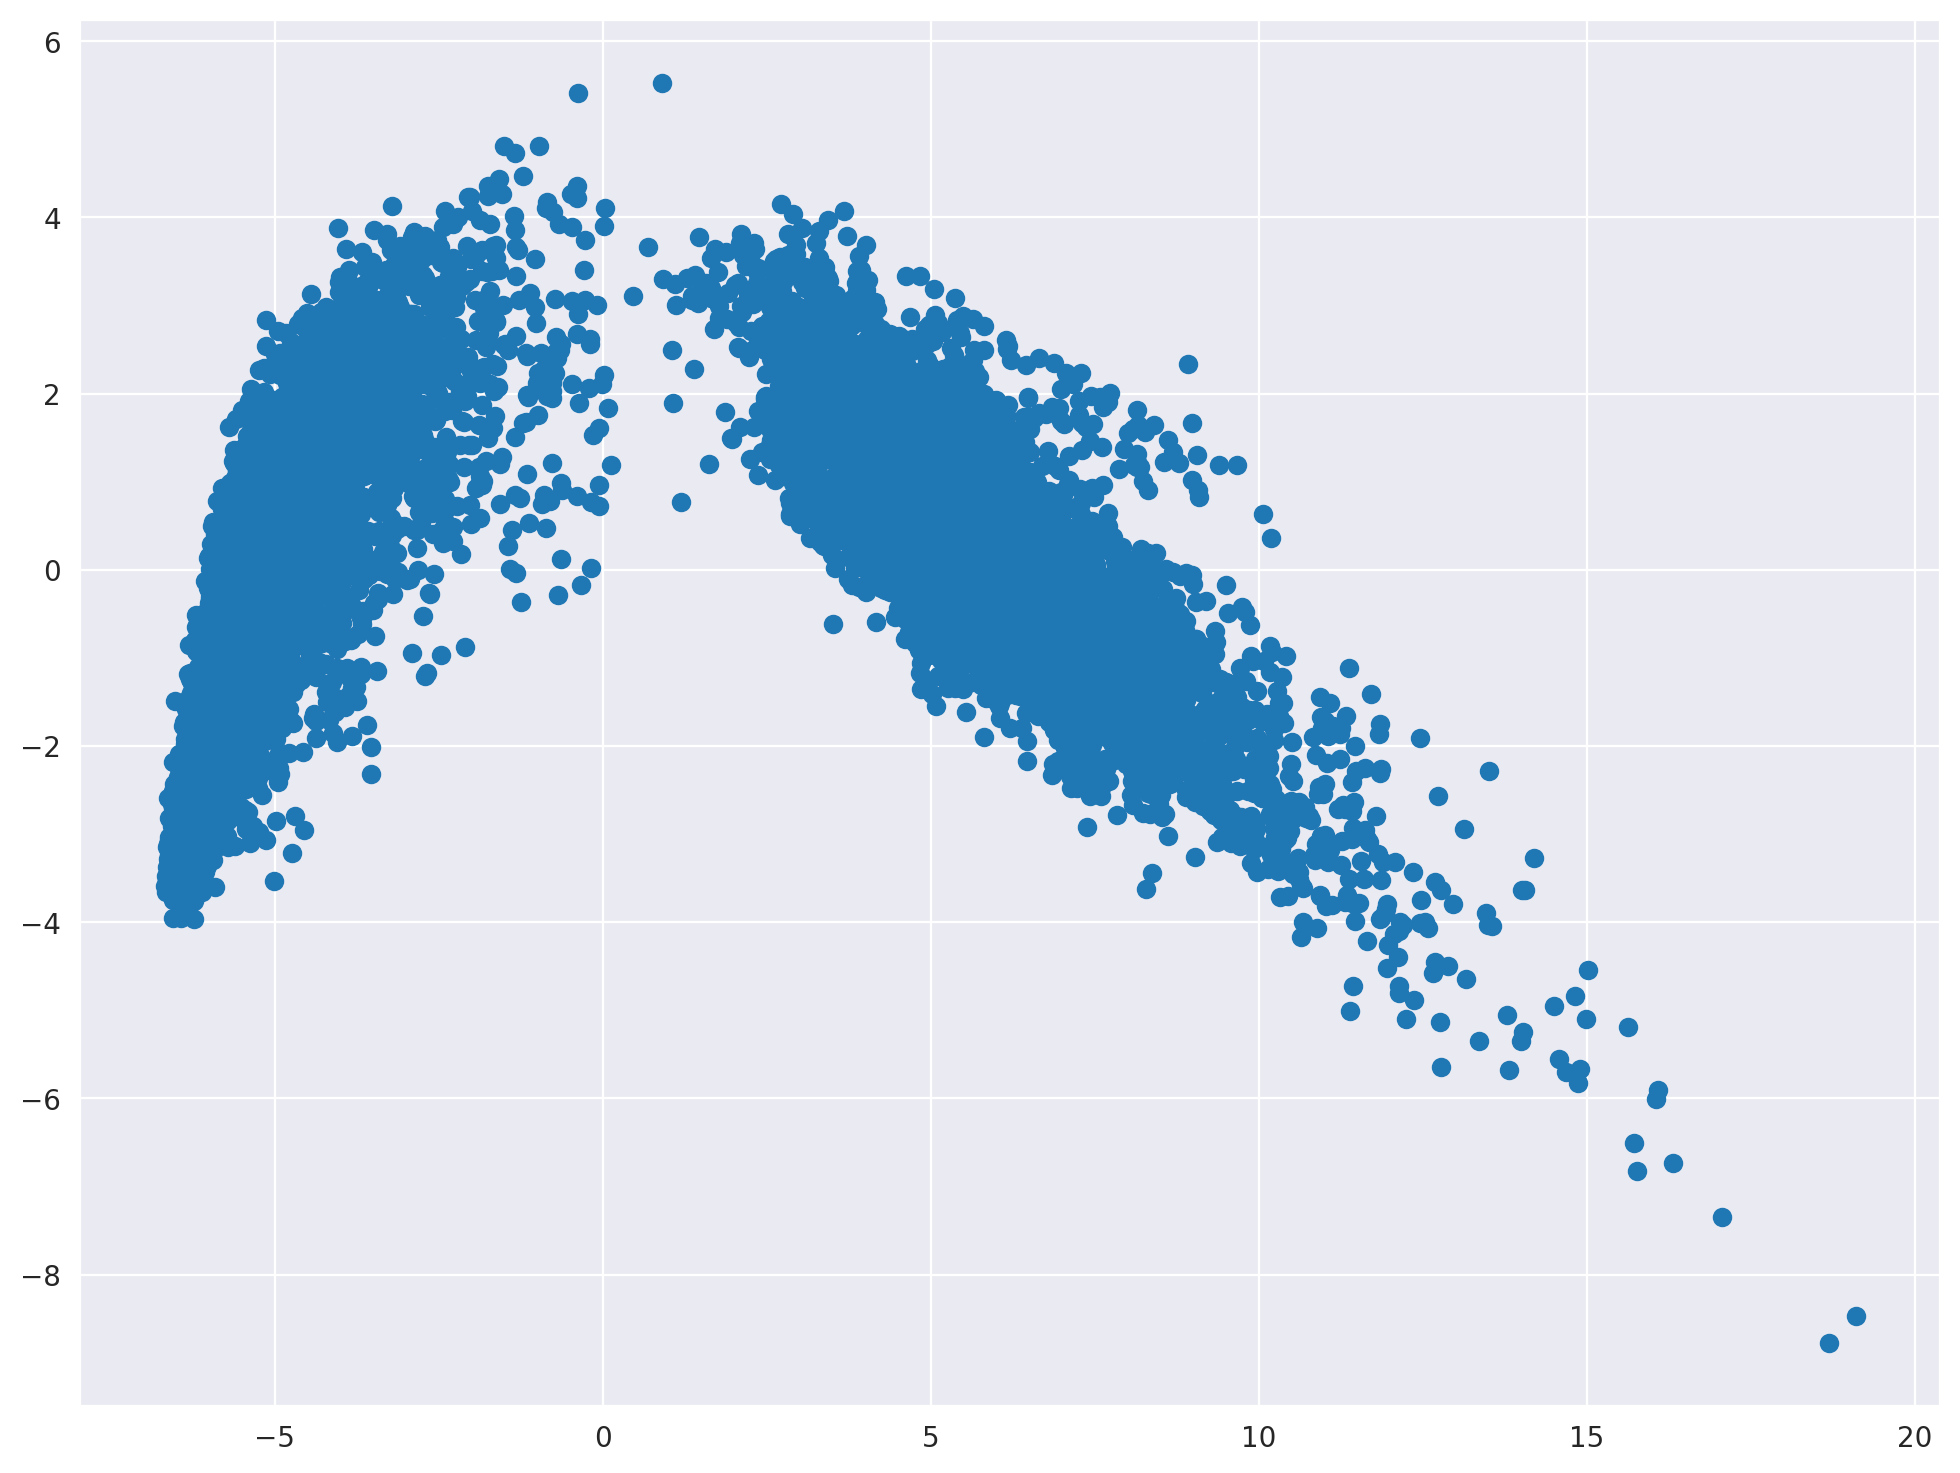

In [124]:
# Ваш код здесь
x_label=X_pca[:,0]
y_label=X_pca[:,1]
plt.scatter(x_label,y_label, cmap='plasma')

### **Задание 19. (0.5 балла)**

Разберёмся с `KMeans`, [doc](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

- Сделайте кластеризацию данных методом `KMeans`, обучив модель на данных со сниженной за счет `PCA` размерностью. Нужно искать 6 кластеров (изначально у нас 6 классов). Засеките время обучения и время инференса.

**Параметры обучения:**

```n_clusters = 6``` (число уникальных меток целевого класса = 6)

```n_init = 100```

```random_state = RANDOM_STATE``` (для воспроизводимости результата, не забывайте указывать его и дальше!)

In [155]:
# Ваш код здесь
import time
from sklearn.cluster import KMeans
start=time.time()
my_cluster=KMeans(6,random_state=RANDOM_STATE,n_init = 100)
answ_arr=my_cluster.fit_predict(X_pca)+1
finish=time.time()
print(finish-start)

10.838085174560547


In [156]:
answ_arr.shape

(10299,)

### **Задание 20 (0.2 балла)**

- Визуализируйте данные в проекции на первые две главные компоненты.
- Раскрасьте точки в соответствии с полученными метками кластеров.

<ipython-input-157-6cb5749d38ec>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(my_dict_0[i+1], my_dict_1[i+1], c=color, cmap='plasma' )


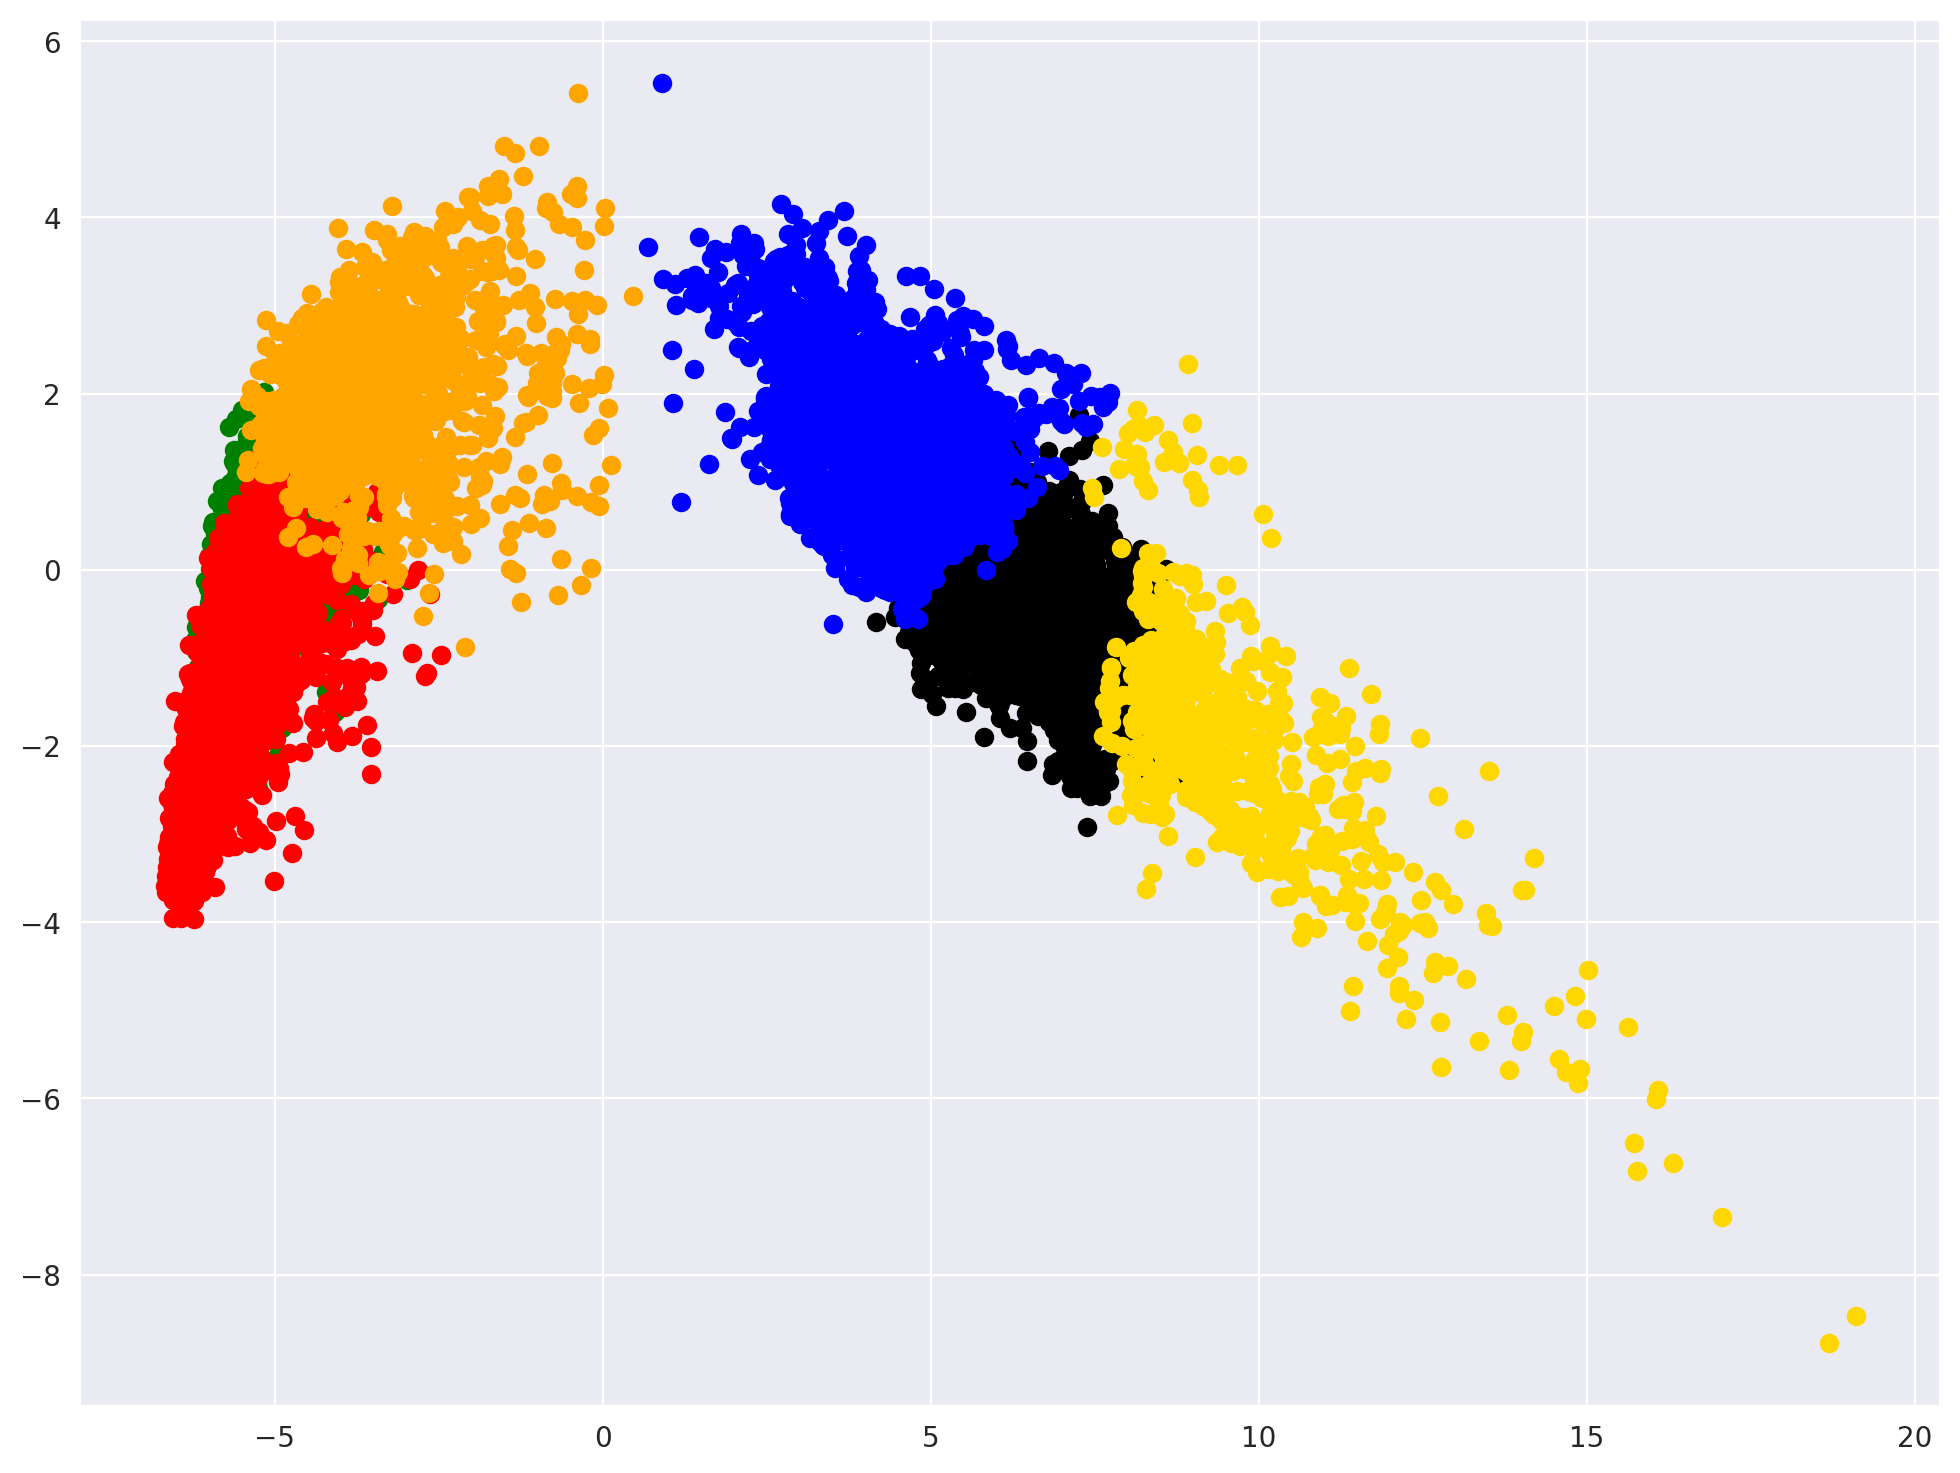

In [157]:
my_dict_0={1:[],2:[],3:[],4:[],5:[],6:[]}
for i,elem in enumerate(X_pca[:,0]):
    my_dict_0[answ_arr[i]].append(elem)

my_dict_1={1:[],2:[],3:[],4:[],5:[],6:[]}
for i,elem in enumerate(X_pca[:,1]):
    my_dict_1[answ_arr[i]].append(elem)
color_list=['black','green','red','blue','gold','orange']
for i, color in enumerate(color_list):
    plt.scatter(my_dict_0[i+1], my_dict_1[i+1], c=color, cmap='plasma' )

### **Задание 21 (0.3 балла)**

- Выберите какие-то метрики (минимум две) из известных вам. Объясните свой выбор
- Выведите на экран значения метрик качества, сделайте вывод о них и используйте их далее.

In [154]:
# Ваш код здесь
from sklearn.metrics import adjusted_mutual_info_score,normalized_mutual_info_score
print(adjusted_mutual_info_score(y[0],answ_arr))
print(normalized_mutual_info_score(y[0],answ_arr))

0.5886561649264518
0.5889406070600403


**Метрики для кластеризации показывают, что алгоритм работает сильно лучше, чем случайное определение классов**

### **Задание 22 (0.7 баллов)**

Теперь попробуем сделать кластеризацию с помощью `AgglomerativeClustering`, [doc](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

- Засеките время обучения и время инференса. После кластеризации также:
  - Вновь визуализируйте данные с раскраской по полученным меткам
  - Выведите метрики. Засеките время обучения и время инференса. Сравните с ```KMeans```.

Ответьте на следующие вопросы:
* Стало ли лучше?
* Почему?

In [163]:
from sklearn.cluster import  AgglomerativeClustering
my_cluster=AgglomerativeClustering(n_clusters=6)
start=time.time()
answ_array=my_cluster.fit_predict(X_pca)+1
finish=time.time()
print(finish-start)
print(adjusted_mutual_info_score(y[0],answ_array))
print(normalized_mutual_info_score(y[0],answ_array))

13.250702857971191
0.6458616762043712
0.6461162487914339


<ipython-input-161-8746851815d2>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(my_dict_0[i+1], my_dict_1[i+1], c=color, cmap='plasma' )


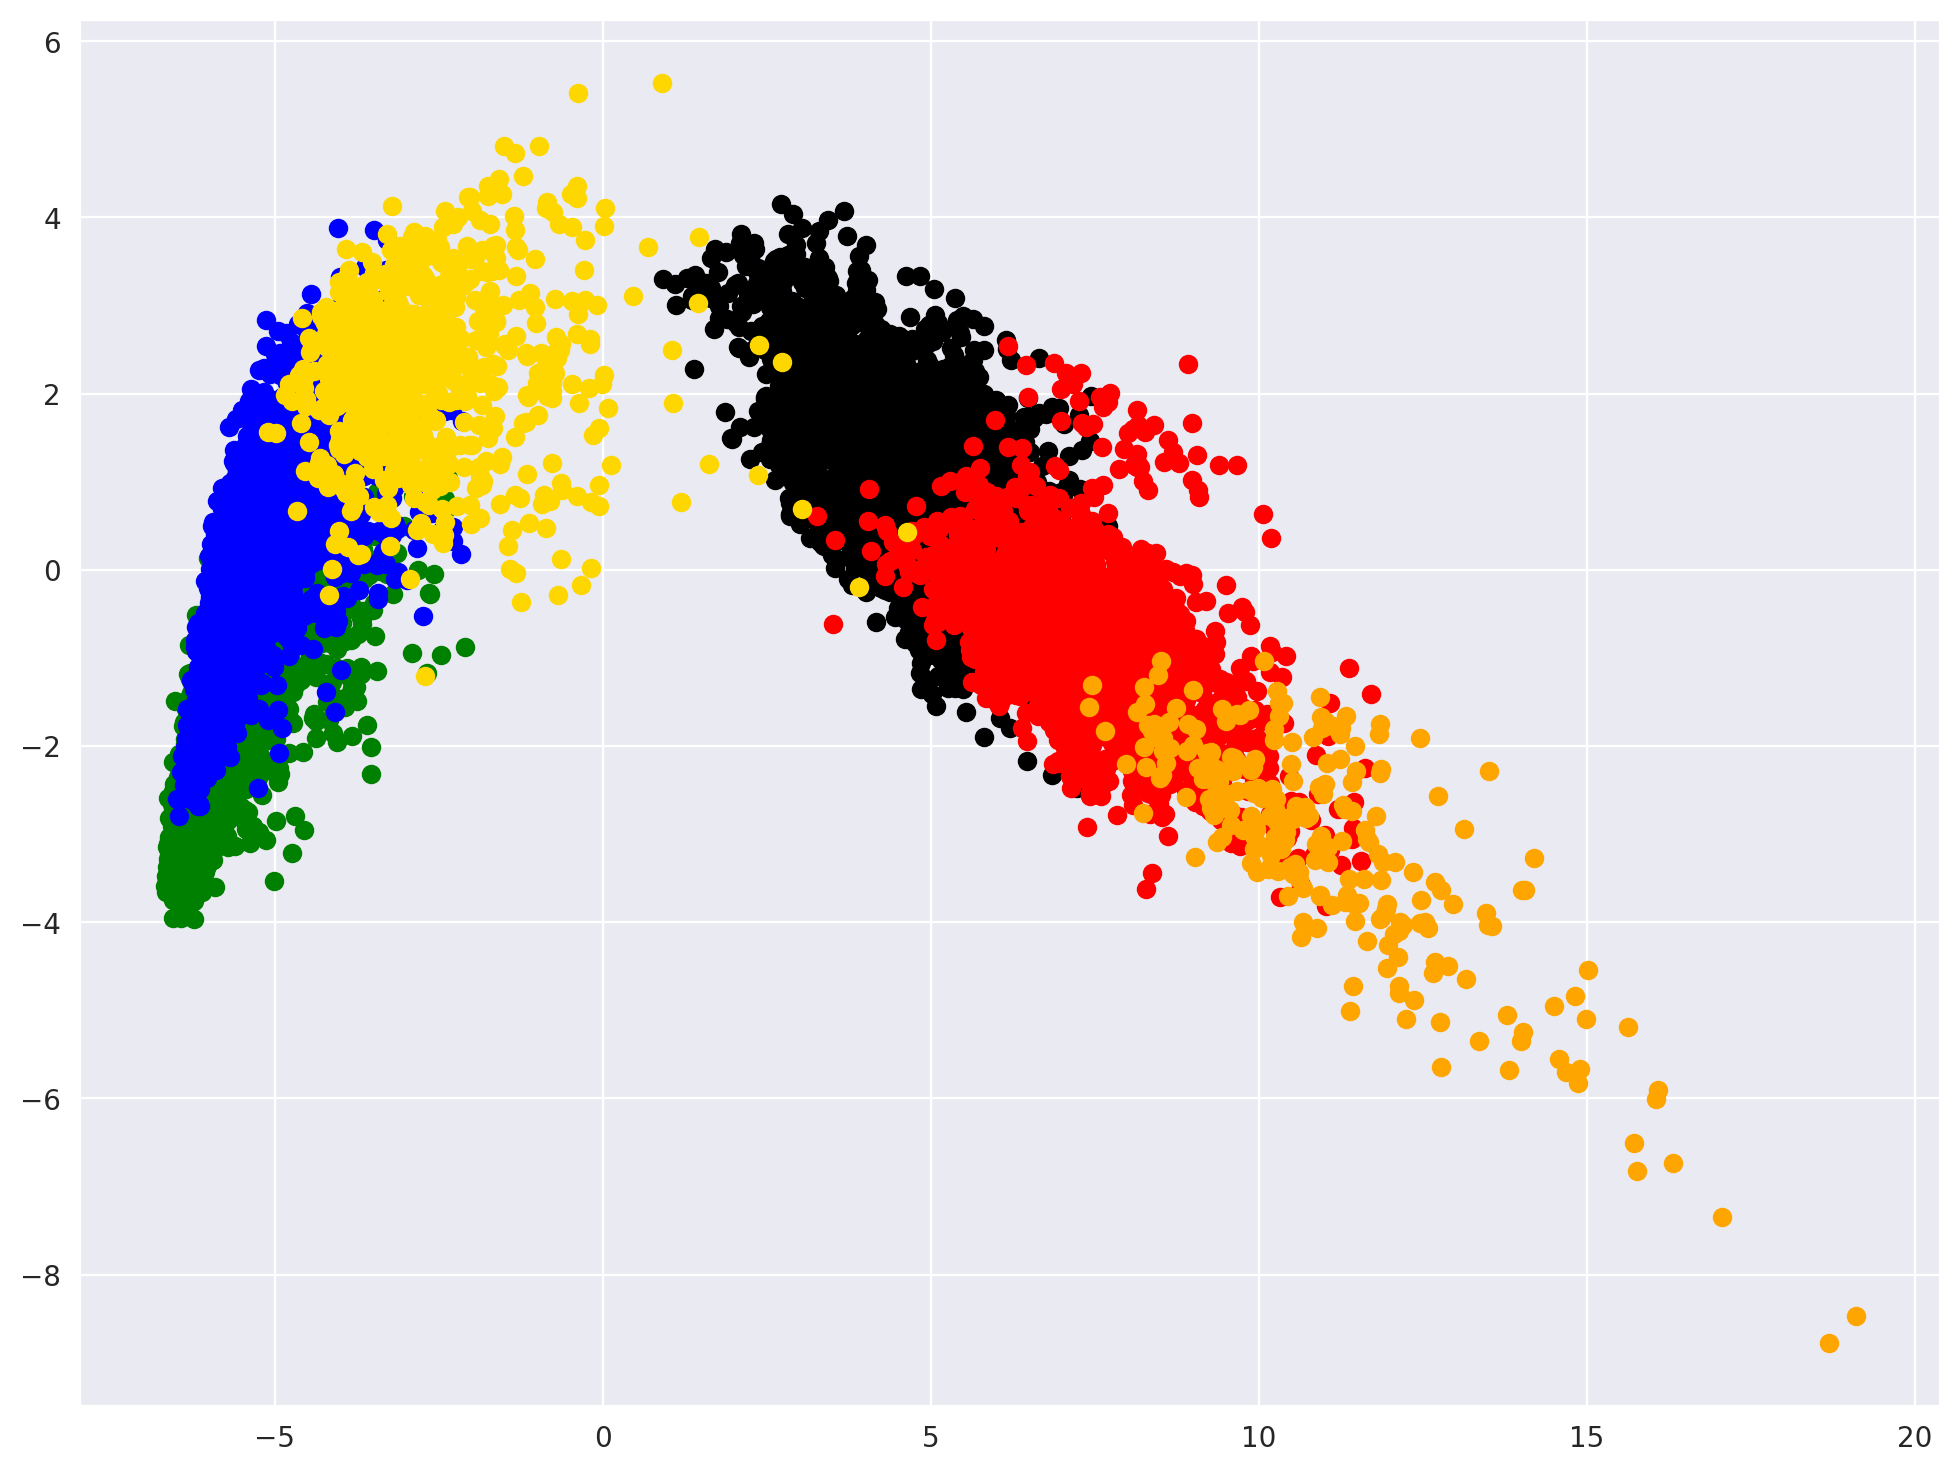

In [161]:
my_dict_0={1:[],2:[],3:[],4:[],5:[],6:[]}
for i,elem in enumerate(X_pca[:,0]):
    my_dict_0[answ_array[i]].append(elem)

my_dict_1={1:[],2:[],3:[],4:[],5:[],6:[]}
for i,elem in enumerate(X_pca[:,1]):
    my_dict_1[answ_array[i]].append(elem)
color_list=['black','green','red','blue','gold','orange']
for i, color in enumerate(color_list):
    plt.scatter(my_dict_0[i+1], my_dict_1[i+1], c=color, cmap='plasma' )

**Стало лучше, это видно как по метрикам, так и по визуализации. Как видно из визуализации, кластеризация двумя методами получилась схожа. Второй алгоритм работает лучше на этом наборе данных,так как идея постепенного объединения ближайших объектов лучше справляется с пересечениями кластеров**

### **Задание 23 (0.3 балла)**
Для самой успешной из полученных кластеризаций попробуйте дать интерпретацию кластеров. Опишите характеристики объектов, попавших в каждый кластер. Для этого можете ответить на следующие вопросы:

* Похожи ли объекты внутри каждого кластера на определенный тип активности человека?
* В каких кластерах смешано несколько типов активности? С чем, на ваш взгляд, это может быть связано?
* Качественная ли получилась кластеризация? На основании чего вы можете сделать такой вывод?

- Можно выделить два явных больших кластера: уславная активность(1-3) и пассивность(4-6), причем, левый большой кластер на рисунке, скорее всего, пассивность.
- В крайнем рисунке синий кластер содержит объекты из зеленого и желтого, и красный - из оранжевого и черного. Скороее всего, эти кластеры "промежуточные", то есть сидение и спуск по лестнице(считаю, что это более трудоемко, чем ходьба). Пересечение кластеров связано с тем, что у каждого человека различные физические параметры: кому-то просто ходить тяжело, а кому-то не трудно в лестницу подняться.
- Считаю, что кластеризация получилась качественная, так как на рисунках отчетливо видны кластеры. И, их расположение отражает то, о чем написано выше.

## **Бонус-задание (1 балл)**
![RedPanda](http://imgur.com/6Aa52Lm.png)

Алгоритмы кластеризации могут применяться в самых разных задачах. Например, в анализе изображений есть задача разделения изображения на семантические компоненты, которую можно решать в том числе с помощью алгоритмов кластеризации. В бонусе предлагаем вам попрактиковаться именно в этом на чудесной утке и совах (```duck.jpg``` и ```owls.jpg```)

### **(0.1 балл)**

- Откройте изображения, после чего визуализируйте их с помощью ```plt.imshow()```

уток и сов нет, поэтому пикчи сам поищу

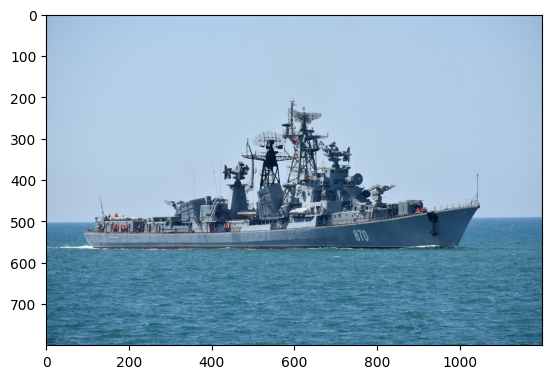

In [2]:
from PIL import Image
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
from sklearn.preprocessing import StandardScaler
image = cv.imread('scale_1200.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow( image)

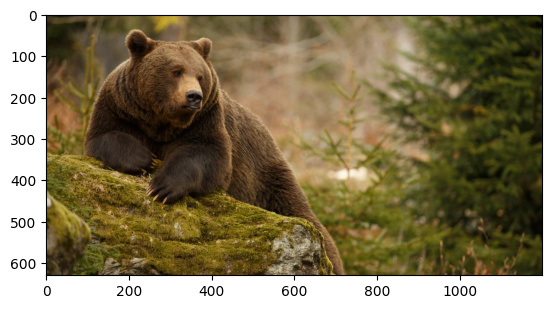

In [3]:
image_1 = cv.imread('bear.jpg')
image_1 = cv.cvtColor(image_1, cv.COLOR_BGR2RGB)
plt.imshow(image_1)

### **(0.4 балла)**

Для каждого изображения, используя кластеризацию ```KMeans```, выделите компоненты, охарактеризовав каждый пиксель следующим образом: $$\psi_i = [\lambda x_i, \lambda y_i, r_i, g_i, b_i]$$
 где
- $x_i$ и $y_i$ — координаты пикселя,
- $r_i, g_i, b_i$ — его цвет,
- $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.

Примените полученную функцию, взяв следующие $\lambda$: 0.3 и 1.5 для ```duck.jpg``` и ```owls.jpg``` (или другие, но тогда с вас красивые результаты :) )

**Примечание:**
Число кластеров подберите разумным образом на свой вкус (в качестве нулевого приближения можно взять 3)

In [4]:
from sklearn.cluster import KMeans
def find_components(image=image, lmbd=0.3, n=3,RANDOM_STATE=42):
    my_cluster=KMeans(n,random_state=RANDOM_STATE)
    img_shape=image.shape
    my_list=[]
    for i,vert in enumerate(image):
        for j,hor in enumerate(vert):
            my_list.append([lmbd*j,lmbd*i,hor[0],hor[1],hor[2]])
    my_array=np.array(my_list)
    scaler =StandardScaler()
    my_array_scaled=scaler.fit_transform(my_array)
    answ=my_cluster.fit_predict(my_array_scaled)
    answ=np.reshape(answ,(img_shape[0],img_shape[1]))
    return answ

In [5]:
ship_clust=find_components(image=image, lmbd=0.0, n=3)

In [6]:
bear_clust=find_components(image=image_1, lmbd=0.3, n=4)

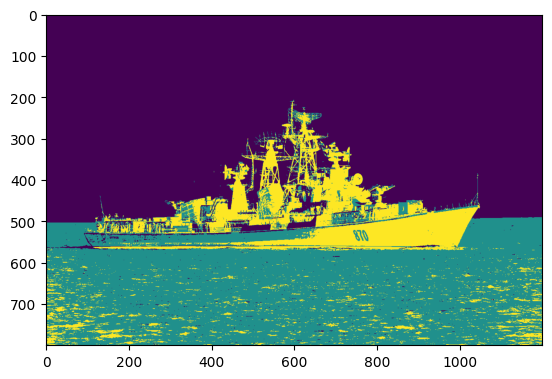

In [7]:
plt.imshow(ship_clust)

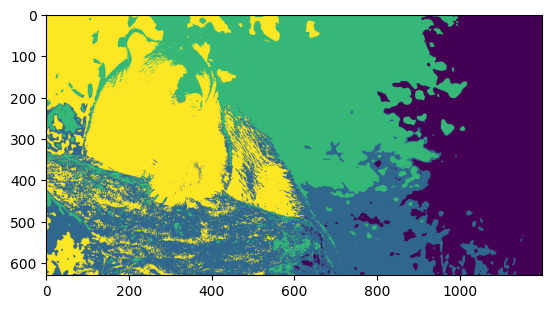

In [8]:
plt.imshow(bear_clust)

### **(0.4 балла)**

Попробуйте выделить сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html).


**Примечание:**

Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету. При необходимости можно сжать изображения в 2 раза.

**Подсказка:**```skimage``` с его ```color``` и ```transform``` в этом помогут :)

Или же воспользуйтесь аналогичными средствами ```PIL``` или ```cv2```

In [9]:
from sklearn.cluster import SpectralClustering
from sklearn.feature_extraction import image as img
def spectral_segmentation(image, n_clusters=3, beta=5, eps=1e-6):
    graph=img.img_to_graph(image)
    graph.data = np.exp(-beta * graph.data / image.std()) + eps
    my_cluster=SpectralClustering(n_clusters=n_clusters,random_state=42)
    answ=my_cluster.fit_predict(graph)
    answ=answ.reshape(image.shape)
    return answ

In [ ]:
spectral_ship=spectral_segmentation(image, n_clusters=3, beta=5, eps=1e-6)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_spectral.py:703: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


In [1]:
plt.imshow(spectral_ship)

NameError: name 'plt' is not defined

In [ ]:
spectral_bear=spectral_segmentation(image=image_1, n_clusters=4, beta=5, eps=1e-6)

In [ ]:
plt.imshow(spectral_bear)

### **(0.1 балл)**
Визуализируйте результаты сегментации (аналогично рисунку в начале задания 2) для обоих методов.